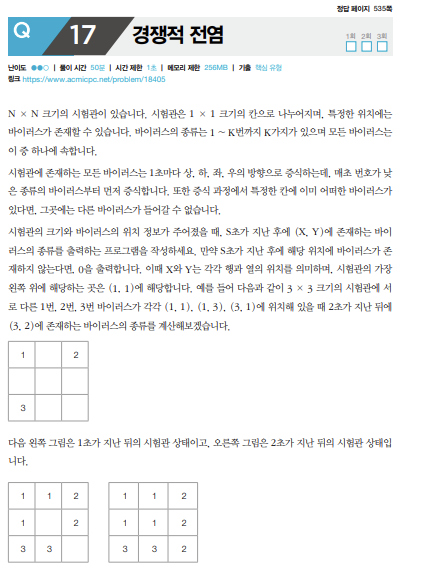

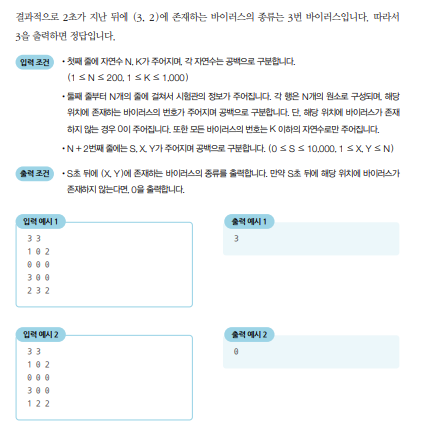

queue에 바이러스 번호, 시간, 위치를 넣어서 BFS 탐색을 하면 된다.

virus.append((graph[i][j],0,i,j))
virus라는 리스트에 바이러스의 번호, 시간, X위치, Y위치를 삽입한다.


그리고 번호가 작은 순서로 바이러스가 퍼지기에 정렬을 하여 queue에 삽입한다.

 

그 후 queue에서 popleft로 꺼내어 BFS 탐색을 하고 탐색을 할 때 시간을 +1 하여준다.
시간(s)가 t_s와 같으면 BFS 탐색을 멈추고 문제에서 요구한 위치의 바이러스를 출력한다.

DFS/BFS는 계속해서 풀어도 아직 감이 오지 않는다.
처음에는 for문을 s 시간 만큼 돌릴려고 했는데 잘 되지 않았다.

그 후 아무리해도 접근 법이 떠오르지 않아 고민 끝에 문제의 풀이를 보고 접근법을 확인한 후에서야 코드를 작성할 수 있었다.
아직까지 DFS/BFS는 연습이 많이 필요한 유형인것 같다.



In [30]:
n, k = map(int, input().split(' '))
graph = [list(map(int, input().split(' '))) for _ in range(n)]

t_s, t_x, t_y = map(int, input("s초 후 (x,y)값!").split(' '))

3 3
1 0 2
0 0 0
3 0 0
s초 후 (x,y)값!2 3 2


In [33]:
## n = 3
virus = []
for i in range(n):
    for j in range(n):
        if graph[i][j] != 0:
            # 바이러스 번호, 시간, X 위치, Y 위치
            virus.append((graph[i][j],0,i,j))
            


In [34]:
dx = [1, -1, 0, 0]
dy = [0, 0, 1, -1]
# 숫자가 낮은 바이러스 부터 실시
virus.sort() ##숫자가 낮은 바이러스 부터!!
q = deque(virus)

print(virus)
print(q)

[(1, 0, 0, 0), (2, 0, 0, 2), (3, 0, 2, 0)]
deque([(1, 0, 0, 0), (2, 0, 0, 2), (3, 0, 2, 0)])


In [35]:
while q:
    v_num, s, x, y = q.popleft()
    if s == t_s:
        break

    for i in range(4):
        nx = x+dx[i]
        ny = y+dy[i]
        if 0<= nx < n and 0<= ny < n:
            if graph[nx][ny] ==0:
                graph[nx][ny] = v_num
                q.append((v_num,s+1,nx,ny))

print(graph[t_x-1][t_y-1])

3


## 답지VER

In [1]:
from collections import deque

n, k = map(int, input().split())

graph = [] # 전체 보드 정보를 담는 리스트
data = [] # 바이러스에 대한 정보를 담는 리스트

for i in range(n):
    # 보드 정보를 한 줄 단위로 입력
    graph.append(list(map(int, input().split())))
    for j in range(n):
        # 해당 위치에 바이러스가 존재하는 경우
        if graph[i][j] != 0:
            # (바이러스 종류, 시간, 위치 X, 위치 Y) 삽입
            data.append((graph[i][j], 0, i, j))

# 정렬 이후에 큐로 옮기기 (낮은 번호의 바이러스가 먼저 증식하므로)
data.sort()
q = deque(data)
 
target_s, target_x, target_y = map(int, input().split())
 
# 바이러스가 퍼져나갈 수 있는 4가지의 위치
dx = [-1, 0, 1, 0]
dy = [0, 1, 0, -1]

# 너비 우선 탐색(BFS) 진행
while q:
    virus, s, x, y = q.popleft()
    # 정확히 s초가 지나거나, 큐가 빌 때까지 반복
    if s == target_s:
        break
    # 현재 노드에서 주변 4가지 위치를 각각 확인
    for i in range(4):
        nx = x + dx[i]
        ny = y + dy[i]
        # 해당 위치로 이동할 수 있는 경우
        if 0 <= nx and nx < n and 0 <= ny and ny < n:
            # 아직 방문하지 않은 위치라면, 그 위치에 바이러스 넣기
            if graph[nx][ny] == 0:
                graph[nx][ny] = virus
                q.append((virus, s + 1, nx, ny))

print(graph[target_x - 1][target_y - 1])


3 3
1 0 2
0 0 0
3 0 0
2 3 2
3
